In [1]:
import numpy as np
import pandas as pd
from zipfile import ZipFile
import os
import nltk
import operator
from nltk.corpus import stopwords
from collections import Counter
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from random import shuffle
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Extracting files and preprocessing data**

In [3]:
file="/content/drive/MyDrive/20_newsgroups.zip"
labels=['comp.graphics', 'rec.sport.hockey', 'sci.med', 'sci.space', 'talk.politics.misc']  
# opening the zip file in READ mode
with ZipFile(file, 'r') as zip:
    zip.printdir()
    zip.extractall()

Streaming output truncated to the last 5000 lines.
20_newsgroups/talk.politics.mideast/76321      1997-03-04 01:02:40          965
__MACOSX/20_newsgroups/talk.politics.mideast/._76321 1997-03-04 01:02:40          226
20_newsgroups/talk.politics.mideast/76322      1997-03-04 01:02:40         3423
__MACOSX/20_newsgroups/talk.politics.mideast/._76322 1997-03-04 01:02:40          226
20_newsgroups/talk.politics.mideast/76323      1997-03-04 01:02:30         6284
__MACOSX/20_newsgroups/talk.politics.mideast/._76323 1997-03-04 01:02:30          226
20_newsgroups/talk.politics.mideast/76324      1997-03-04 01:02:30          630
__MACOSX/20_newsgroups/talk.politics.mideast/._76324 1997-03-04 01:02:30          226
20_newsgroups/talk.politics.mideast/76325      1997-03-04 01:02:30         2035
__MACOSX/20_newsgroups/talk.politics.mideast/._76325 1997-03-04 01:02:30          226
20_newsgroups/talk.politics.mideast/76326      1997-03-04 01:02:30         2281
__MACOSX/20_newsgroups/talk.politics.mi

In [4]:
file_name="20_newsgroups"
classes=[]
folders = os.listdir(file_name)
file_list=[]
count = 0

for l in labels:
  for root, _, files in os.walk(str(os.getcwd())+'/'+file_name+'/'+str(l)):
      for file in files:
          file_path = os.path.join(root, file)
          file_list.append(file_path)
          classes.append(l)
        
len(file_list),len(classes)

(5000, 5000)

**Preprocessing includes:**


*  Remove stop words like is, are
*  Convert numbers to words
*  Replacing special symbols with space
*  Removing extra spaces
*  Performing lemmetization and stemming
*  converting whole text to lower case
* word tokenization



In [5]:
stop_words=stopwords.words('english')
word_tokenizer=nltk.tokenize.WhitespaceTokenizer()

In [6]:
def convert_numbers(text):
  text = np.char.replace(text, "0", " zero ")
  text = np.char.replace(text, "1", " one ")
  text = np.char.replace(text, "2", " two ")
  text = np.char.replace(text, "3", " three ")
  text = np.char.replace(text, "4", " four ")
  text = np.char.replace(text, "5", " five ")
  text = np.char.replace(text, "6", " six ")
  text = np.char.replace(text, "7", " seven ")
  text = np.char.replace(text, "8", " eight ")
  text = np.char.replace(text, "9", " nine ")
  return text


def lemmatize_text(text):
  return [WordNetLemmatizer().lemmatize(w) for w in word_tokenizer.tokenize(text)]

def numberstowords(text):
  return [word for word in convert_numbers(text)]

def remove_stopwords(text):
  return [item for item in text if item not in stop_words]

def stemming(text):
  return [PorterStemmer().stem(y) for y in text]  

def length_two(text):
  return [item for item in text if len(item)>=2]



In [7]:
def preprocess(text):
    # print(type(text))
    text=text.str.lower()
    text=text.str.replace('[{}]'.format('!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~\n\t\\\€«§8»ş'), ' ')
    text=text.apply(lemmatize_text)
    text=text.apply(numberstowords)
    text=text.str.join(' ')
    text=text.apply(lemmatize_text)    
    text=text.apply(remove_stopwords)
    text=text.apply(stemming)
    text=text.apply(length_two)
    return text

In [8]:
#performing preprocessing and saving the data
docs = []
# word_list={}
for path in file_list:
  file = open(path, 'r', encoding='cp1250')
  text = file.read().strip()
  # df=pd.DataFrame([text]).T
  # data=preprocess(df[0]).tolist()
  # data_new=list(set(data[0]))
  # for i in data_new:
  #   if i not in word_list.keys():
  #     word_list[i]=[path]
  #   else:
  #     k=word_list[i]
  #     k.append(path)
  #     word_list[i]=k
  file.close()
  docs.append(text)
docs_pd = pd.DataFrame([docs,classes]).T
# print(docs_pd)
docs_pd[0] = preprocess(docs_pd[0])
docs_pd.to_csv("docs_pd.csv")
docs_pd.to_pickle("docs_pd")
docs_pd

,0,1
0,"[xref, cantaloup, srv, cmu, edu, comp, graphic...",comp.graphics
1,"[path, cantaloup, srv, cmu, edu, crabappl, srv...",comp.graphics
2,"[path, cantaloup, srv, cmu, edu, da, news, har...",comp.graphics
3,"[xref, cantaloup, srv, cmu, edu, comp, edu, se...",comp.graphics
4,"[newsgroup, comp, graphic, path, cantaloup, sr...",comp.graphics
...,...,...
4995,"[xref, cantaloup, srv, cmu, edu, soc, mot, one...",talk.politics.misc
4996,"[xref, cantaloup, srv, cmu, edu, talk, polit, ...",talk.politics.misc
4997,"[path, cantaloup, srv, cmu, edu, crabappl, srv...",talk.politics.misc
4998,"[newsgroup, talk, polit, misc, path, cantaloup...",talk.politics.misc


In [9]:
docs_pd=pd.read_pickle('/content/docs_pd')

# **Naive Bayes Model**


Normal naive bayes from scratch






In [10]:
class Naive_Bayes:
    
  #returning frquency of word per class and total number of words in that class  
  def _word_freq(self,word, label):
    try:
        return self._word_freq_per_class[label, word], self._number_words_perclass[label]
    except:
        return 0, self._number_words_perclass[label]

  def fit(self,X_train,y_train):
    words=X_train
    classes=y_train
    self._m_dict={}
    self._len=len(X_train)

    #creating dictonary containing words per class
    for i in range(self._len):
      if classes[i] in self._m_dict.keys():
          self._m_dict[classes[i]]=self._m_dict[classes[i]] + words[i]
      else:
          self._m_dict[classes[i]]=words[i]

    #creating bag of words
    self._bag_words=set()
    for key,value in self._m_dict.items():
      for i in value:
        self._bag_words.add(i)

    #calculating frquency of each word per class and total number of words in that class      
    self._word_freq_per_class= {}
    self._number_words_perclass={}
    for i in labels:
      freq_list = Counter(self._m_dict[i])
      count=len(freq_list)
      self._number_words_perclass[i]=count
      for j in freq_list:
          self._word_freq_per_class[i,j]=freq_list[j]

    #calculating the frequency of each class      
    self._freq_train={}
    for i in y_train:
      if i not in self._freq_train.keys():
        self._freq_train[i]=1
      else:
        self._freq_train[i]+=1
    
#calculating the probability of each word in test set and returning the classes for each set of words which have max probability acc to class
  def predict(self,X_test):
    predict_data=[]
    for i in range(len(X_test)):
        class_words_prob = []
        for l in labels:
            words_probability = 0
            for word in X_test[i]:
                fr,cn=self._word_freq(word, l)
                pp=(fr+1)/(cn+len(self._bag_words))
                words_probability+=np.log(pp)
            class_words_prob.append(words_probability)
        predict_data.append(labels[np.argmax(class_words_prob)])
    return predict_data
  
  def calc_accuracy(self,y_pred,y_test):
    score= len([1 for i in range(len(y_pred)) if y_pred[i]==y_test[i]])
    return score/len(y_pred)

  def confusion_matrix(self,y_pred,y_test):
    matrix= np.zeros((len(labels), len(labels))).astype(int)
    for i in range(len(y_pred)):
        matrix[labels.index(y_pred[i])][labels.index(y_test[i])]+= 1
    return matrix  






In [11]:
ratio=[0.5,0.7,0.8]
naive_dict=[]
for i in range(3):
  train=docs_pd.sample(frac=ratio[i],random_state=41)
  X_train,y_train=train[0].tolist(),train[1].tolist()
  test=docs_pd.sample(frac=1,random_state=41).drop(train.index)
  X_test,y_test=test[0].tolist(),test[1].tolist()
  nb=Naive_Bayes()
  nb.fit(X_train,y_train)
  y_pred=nb.predict(X_test)
  r=int(ratio[i]*100)
  acc=nb.calc_accuracy(y_pred,y_test)*100
  naive_dict.append(acc)
  print("*"*10,"At ratio {}:{}".format(r,100-r),"*"*10)
  print("Confusion Matrix is- \n",nb.confusion_matrix(y_pred,y_test))
  print("Accuracy is {:.2f} \n".format(acc))


********** At ratio 50:50 **********
Confusion Matrix is- 
 [[484   0   7   7   0]
 [  7 481   5   1   1]
 [  6   0 461   2   0]
 [  9   0  10 479   4]
 [ 10   6  12  12 496]]
Accuracy is 96.04 

********** At ratio 70:30 **********
Confusion Matrix is- 
 [[309   0   3   2   0]
 [  5 291   1   1   0]
 [  3   0 268   2   0]
 [  4   0  11 286   2]
 [  2   4   9   3 294]]
Accuracy is 96.53 

********** At ratio 80:20 **********
Confusion Matrix is- 
 [[208   0   3   3   0]
 [  5 189   1   2   0]
 [  2   0 167   1   0]
 [  1   0   8 202   0]
 [  1   3   6   3 195]]
Accuracy is 96.10 



# **Naive Bayes with TF-ICF**

In [12]:
class NaiveBayes_tf_icf:

  def _word_freq(self,word, label):
    try:
        return self._word_freq_per_class[label, word], self._number_words_perclass[label]
    except:
        return 0, self._number_words_perclass[label]

  def _cal_tf_icf(self):
    self._tf_icf={}
    c=Counter(self._word_list)
    for i in set(self._word_list):
      tf=c[i]
      icf=np.log(len(self._m_dict)/self._class_word[i]+1)
      self._tf_icf[i]=tf*icf


  def fit(self,X_train,y_train):
    words=X_train
    self._N=len(words)
    classes=y_train
    self._m_dict={}
    for i in range(self._N):
      if classes[i] in self._m_dict.keys():
          self._m_dict[classes[i]]=self._m_dict[classes[i]] + words[i]
      else:
          self._m_dict[classes[i]]=words[i]
    #list of words it can contain multiple occurences of same word
    self._word_list= []
    for i in self._m_dict:
        self._word_list=self._word_list +self._m_dict[i]
    #count of word per class
    self._class_word={}
    for i in self._m_dict:
      l=self._m_dict[i]
      for j in set(l):
        if j not in self._class_word.keys():
          self._class_word[j]=1
        else:
          self._class_word[j]+=1
    self._cal_tf_icf()
    sorted_x = sorted(self._tf_icf.items(), key=operator.itemgetter(1), reverse=True)
    self._unique_words = [i[0] for i in sorted_x[:int(len(sorted_x)*10/100)]]  #here we are considering top 10% features 
    self._word_freq_per_class= {}
    self._number_words_perclass={}
    for i in labels:
        freq_list= Counter(self._m_dict[i])
        for j in self._unique_words:
            self._word_freq_per_class[i,j] = freq_list[j]
            if i in self._number_words_perclass.keys():
                self._number_words_perclass[i] = self._number_words_perclass[i] +freq_list[j]
            else:
                self._number_words_perclass[i] = freq_list[j]
    self._freq_train={}
    for i in y_train:
      if i not in self._freq_train.keys():
        self._freq_train[i]=1
      else:
        self._freq_train[i]+=1



  def predict(self,X_test):
    predict= []
    for i in range(len(X_test)):
        classes_words_probability = []
        for l in labels:
            words_probability = 0
            for word in X_test[i]:
                fr, cn = self._word_freq(word, l)
                pp = (fr+1) /(cn+len(self._unique_words))
                words_probability += np.log(pp)
            classes_words_probability.append(words_probability)
        predict.append(labels[np.argmax(classes_words_probability)])
    return predict

  def confusion_matrix(self,y_pred,y_test):
    matrix= np.zeros((len(labels), len(labels))).astype(int)
    for i in range(len(y_pred)):
        matrix[labels.index(y_pred[i])][labels.index(y_test[i])]+= 1
    return matrix
  
  def cal_accuracy(self,y_pred,y_test):
    return len([1 for i in range(len(y_pred)) if y_pred[i]==y_test[i]])/len(y_pred)

In [13]:
ratio=[0.5,0.7,0.8]
naive_tf_dict=[]
for i in range(3):
  train=docs_pd.sample(frac=ratio[i],random_state=41)
  X_train,y_train=train[0].tolist(),train[1].tolist()
  test=docs_pd.sample(frac=1,random_state=41).drop(train.index)
  X_test,y_test=test[0].tolist(),test[1].tolist()
  nb=NaiveBayes_tf_icf()
  nb.fit(X_train,y_train)
  y_pred=nb.predict(X_test)
  r=int(ratio[i]*100)
  acc=nb.cal_accuracy(y_pred,y_test)*100
  naive_tf_dict.append(acc)
  print("*"*10,"At ratio {}:{}".format(r,100-r),"*"*10)
  print("Confusion Matrix is- \n",nb.confusion_matrix(y_pred,y_test))
  print("Accuracy is {:.2f} \n".format(acc))

********** At ratio 50:50 **********
Confusion Matrix is- 
 [[511   2  21  14   0]
 [  2 482   3   3   2]
 [  0   0 464   3   2]
 [  3   1   6 478   9]
 [  0   2   1   3 488]]
Accuracy is 96.92 

********** At ratio 70:30 **********
Confusion Matrix is- 
 [[321   2   8   7   1]
 [  1 291   0   2   0]
 [  0   0 278   5   1]
 [  1   0   4 280   4]
 [  0   2   2   0 290]]
Accuracy is 97.33 

********** At ratio 80:20 **********
Confusion Matrix is- 
 [[215   2   5   5   0]
 [  2 188   1   2   0]
 [  0   0 173   1   0]
 [  0   0   4 203   4]
 [  0   2   2   0 191]]
Accuracy is 97.00 



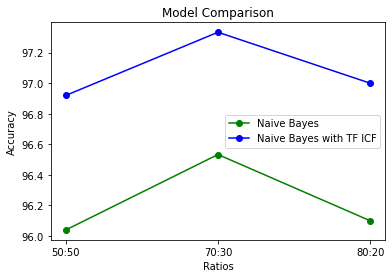

In [14]:
# #graph for analysis
import matplotlib.pyplot as plt
ratios =['50:50','70:30','80:20']
plt.plot(ratios,naive_dict, 'g', label='Naive Bayes',marker='o')
plt.plot(ratios, naive_tf_dict, 'b', label='Naive Bayes with TF ICF',marker='o')
plt.title('Model Comparison')
plt.xlabel('Ratios')
plt.ylabel('Accuracy')
plt.legend()
plt.show()